## Bioinformatics - Data Collection and Pre-Processing

In [1]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [2]:
target = new_client.target
target_query = target.search('CHEMBL247')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q72547', 'xref_name': None, 'xre...",Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,17.0,False,CHEMBL247,"[{'accession': 'Q72547', 'component_descriptio...",SINGLE PROTEIN,11676


In [3]:
selected_target = targets.target_chembl_id[0] # retrieve bioactivity data reported as IC50 values
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [4]:
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32097,[],CHEMBL798926,Inhibition of purified recombinant HIV-1 rever...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,uM,UO_0000065,None,10.0
1,None,Not Determined,32106,[],CHEMBL798927,Inhibitory activity of compound against purifi...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,uM,UO_0000065,None,None
2,None,None,32524,[],CHEMBL802044,Inhibition of HIV-1 reverse transcriptase (HIV...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,Log IC50,None,UO_0000065,None,-6.34
3,None,None,33653,[],CHEMBL802598,Inhibitory activity against HIV-1 Reverse tran...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,uM,UO_0000065,None,100.0
4,None,None,34814,[],CHEMBL800982,Inhibitory concentration against HIV-1 replica...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,uM,UO_0000065,None,32.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10215,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24837826,[],CHEMBL5144840,Inhibition of HIV1 reverse transcriptase asses...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,nM,UO_0000065,None,4.8
10216,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24837827,[],CHEMBL5144840,Inhibition of HIV1 reverse transcriptase asses...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,nM,UO_0000065,None,123.5
10217,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24837828,[],CHEMBL5144840,Inhibition of HIV1 reverse transcriptase asses...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,nM,UO_0000065,None,119.1
10218,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24837829,[],CHEMBL5144840,Inhibition of HIV1 reverse transcriptase asses...,B,None,None,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,None,None,IC50,nM,UO_0000065,None,694.8


In [6]:
df.to_csv('data/bioactivity_raw.csv',index=False)

### Handling missing data

In [7]:
import pandas as pd
df = pd.read_csv('data/bioactivity_raw.csv',dtype = {'Canonical_smiles':str})

In [8]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,32097,[],CHEMBL798926,Inhibition of purified recombinant HIV-1 rever...,B,NaN,NaN,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,NaN,NaN,IC50,uM,UO_0000065,NaN,10.00
1,NaN,Not Determined,32106,[],CHEMBL798927,Inhibitory activity of compound against purifi...,B,NaN,NaN,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,NaN,NaN,IC50,uM,UO_0000065,NaN,NaN
2,NaN,NaN,32524,[],CHEMBL802044,Inhibition of HIV-1 reverse transcriptase (HIV...,B,NaN,NaN,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,NaN,NaN,Log IC50,NaN,UO_0000065,NaN,-6.34
3,NaN,NaN,33653,[],CHEMBL802598,Inhibitory activity against HIV-1 Reverse tran...,B,NaN,NaN,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,NaN,NaN,IC50,uM,UO_0000065,NaN,100.00
4,NaN,NaN,34814,[],CHEMBL800982,Inhibitory concentration against HIV-1 replica...,B,NaN,NaN,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,NaN,NaN,IC50,uM,UO_0000065,NaN,32.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10215,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24837826,[],CHEMBL5144840,Inhibition of HIV1 reverse transcriptase asses...,B,NaN,NaN,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,NaN,NaN,IC50,nM,UO_0000065,NaN,4.80
10216,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24837827,[],CHEMBL5144840,Inhibition of HIV1 reverse transcriptase asses...,B,NaN,NaN,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,NaN,NaN,IC50,nM,UO_0000065,NaN,123.50
10217,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24837828,[],CHEMBL5144840,Inhibition of HIV1 reverse transcriptase asses...,B,NaN,NaN,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,NaN,NaN,IC50,nM,UO_0000065,NaN,119.10
10218,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24837829,[],CHEMBL5144840,Inhibition of HIV1 reverse transcriptase asses...,B,NaN,NaN,BAO_0000190,...,Human immunodeficiency virus 1,Human immunodeficiency virus type 1 reverse tr...,11676,NaN,NaN,IC50,nM,UO_0000065,NaN,694.80


In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df2.canonical_smiles.notna()]
print(f"The shape for df1 and df2 are {df.shape} and {df2.shape}")

The shape for df1 and df2 are (10220, 46) and (9770, 46)


In [10]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3.reset_index(drop=True, inplace=True)
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,10000.00
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,457.09
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,100000.00
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,32100.00
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,12600.00
...,...,...,...
9765,CHEMBL85059,Cc1cc(C)cc(S(=O)(=O)c2c(C(N)=O)[nH]c3ccc(Cl)cc...,4.80
9766,CHEMBL5177915,Cc1cc(C)cc(S(=O)(=O)c2c(C(=O)NCc3cccc(B(O)O)c3...,123.50
9767,CHEMBL5174976,Cc1cc(C)cc(S(=O)(=O)c2c(C(=O)NCc3ccc(B4OC(C)(C...,119.10
9768,CHEMBL308954,Cc1cc(C#N)cc(C)c1Oc1nc(Nc2ccc(C#N)cc2)nc(N)c1Br,694.80


In [11]:
df3.standard_value.describe()

count    9.770000e+03
mean     6.107151e+04
std      5.708410e+05
min      5.000000e-05
25%      9.500000e+01
50%      9.000000e+02
75%      1.000000e+04
max      1.901078e+07
Name: standard_value, dtype: float64

<Axes: ylabel='standard_value'>

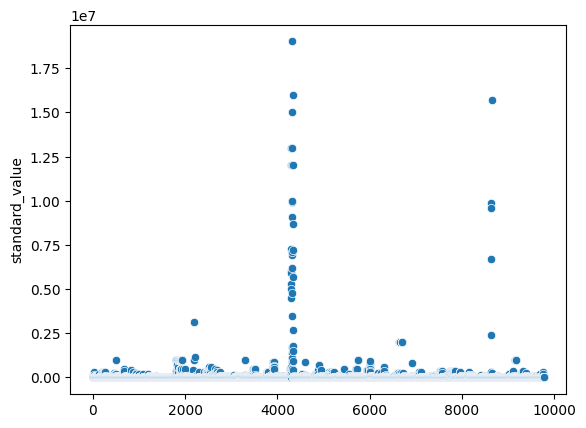

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=df3.index, y='standard_value', data=df3)

In [18]:
high_IC50_rows = df3[df3['standard_value'] > 1000000].index
high_IC50_rows

Index([2192, 2210, 4295, 4296, 4297, 4299, 4301, 4302, 4304, 4305, 4307, 4308,
       4311, 4313, 4314, 4315, 4316, 4317, 4318, 4320, 4322, 4323, 4324, 4325,
       4326, 4327, 4328, 4329, 4330, 4331, 4332, 4334, 4335, 4336, 4337, 6645,
       6650, 6655, 6660, 6665, 6698, 6699, 6700, 6701, 8631, 8633, 8634, 8635,
       8641],
      dtype='int64')

In [19]:
df_final = df3[df3['standard_value'] <= 1000000]
df_final

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,10000.00
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,457.09
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,100000.00
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,32100.00
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,12600.00
...,...,...,...
9765,CHEMBL85059,Cc1cc(C)cc(S(=O)(=O)c2c(C(N)=O)[nH]c3ccc(Cl)cc...,4.80
9766,CHEMBL5177915,Cc1cc(C)cc(S(=O)(=O)c2c(C(=O)NCc3cccc(B(O)O)c3...,123.50
9767,CHEMBL5174976,Cc1cc(C)cc(S(=O)(=O)c2c(C(=O)NCc3ccc(B4OC(C)(C...,119.10
9768,CHEMBL308954,Cc1cc(C#N)cc(C)c1Oc1nc(Nc2ccc(C#N)cc2)nc(N)c1Br,694.80


In [20]:
import numpy as np
def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', axis = 1)
        
    return x

In [21]:
df_final = pIC50(df_final)
df_final

/var/folders/pj/44_k69r55f7c8lndy32p_y1m0000gn/T/ipykernel_68238/2493827041.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['pIC50'] = pIC50


,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,5.000000
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,6.339998
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,4.000000
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,4.493495
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,4.899629
...,...,...,...
9765,CHEMBL85059,Cc1cc(C)cc(S(=O)(=O)c2c(C(N)=O)[nH]c3ccc(Cl)cc...,8.318759
9766,CHEMBL5177915,Cc1cc(C)cc(S(=O)(=O)c2c(C(=O)NCc3cccc(B(O)O)c3...,6.908333
9767,CHEMBL5174976,Cc1cc(C)cc(S(=O)(=O)c2c(C(=O)NCc3ccc(B4OC(C)(C...,6.924088
9768,CHEMBL308954,Cc1cc(C#N)cc(C)c1Oc1nc(Nc2ccc(C#N)cc2)nc(N)c1Br,6.158140


In [22]:
df_final.pIC50.describe()

count    9721.000000
mean        6.035168
std         1.398007
min         3.000000
25%         5.000000
50%         6.045757
75%         7.031517
max        13.301030
Name: pIC50, dtype: float64

In [23]:
df_final.to_csv('data/Preprocessed_9721x3.csv',index=False)

## Dataset Preparation

In [24]:
import pandas as pd
df = pd.read_csv('data/Preprocessed_9721x3.csv')
df

,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,5.000000
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,6.339998
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,4.000000
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,4.493495
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,4.899629
...,...,...,...
9716,CHEMBL85059,Cc1cc(C)cc(S(=O)(=O)c2c(C(N)=O)[nH]c3ccc(Cl)cc...,8.318759
9717,CHEMBL5177915,Cc1cc(C)cc(S(=O)(=O)c2c(C(=O)NCc3cccc(B(O)O)c3...,6.908333
9718,CHEMBL5174976,Cc1cc(C)cc(S(=O)(=O)c2c(C(=O)NCc3ccc(B4OC(C)(C...,6.924088
9719,CHEMBL308954,Cc1cc(C#N)cc(C)c1Oc1nc(Nc2ccc(C#N)cc2)nc(N)c1Br,6.158140


In [25]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [26]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-07-25 21:58:40--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-07-25 21:58:40--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8003::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: 'padel.zip'

padel.zip           100%[===================>]  24.57M  28.6MB/s    in 0.9s    

2023-07-25 21:58:42 (28.6 MB/s) - 'padel.zip' saved [25768637/25768637]

--2023-07-25 21:58:42-

In [27]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [28]:
! bash padel.sh

Processing CHEMBL296346 in molecule.smi (1/9721). 
Processing CHEMBL318730 in molecule.smi (2/9721). 
Processing CHEMBL303928 in molecule.smi (3/9721). 
Processing CHEMBL68175 in molecule.smi (4/9721). 
Processing CHEMBL69775 in molecule.smi (5/9721). 
Processing CHEMBL431274 in molecule.smi (6/9721). 
Processing CHEMBL68933 in molecule.smi (7/9721). 
Processing CHEMBL69566 in molecule.smi (8/9721). 
Processing CHEMBL67451 in molecule.smi (9/9721). Average speed: 2.91 s/mol.
Processing CHEMBL121835 in molecule.smi (10/9721). Average speed: 1.58 s/mol.
Processing CHEMBL125510 in molecule.smi (11/9721). Average speed: 1.09 s/mol.
Processing CHEMBL125873 in molecule.smi (12/9721). Average speed: 0.83 s/mol.
Processing CHEMBL223228 in molecule.smi (13/9721). Average speed: 0.67 s/mol.
Processing CHEMBL66043 in molecule.smi (14/9721). Average speed: 0.57 s/mol.
Processing CHEMBL69275 in molecule.smi (15/9721). Average speed: 0.50 s/mol.
Processing CHEMBL57 in molecule.smi (16/9721). Average

In [29]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X.to_csv('data/descriptors.csv',index=False)
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL296346,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL303928,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL68175,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL69775,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL68933,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9716,CHEMBL204900,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9717,CHEMBL85059,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9718,CHEMBL308954,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9719,CHEMBL5177915,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9716,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9717,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9718,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9719,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df3_X.to_csv('data/Xdata_9721x881.csv',index = False)

In [33]:
df = pd.read_csv('data/Preprocessed_9721x3.csv')
df3_Y = df['pIC50']
df3_Y

0       5.000000
1       6.339998
2       4.000000
3       4.493495
4       4.899629
          ...   
9716    8.318759
9717    6.908333
9718    6.924088
9719    6.158140
9720    5.602060
Name: pIC50, Length: 9721, dtype: float64

In [34]:
df3_Y.describe()

count    9721.000000
mean        6.035168
std         1.398007
min         3.000000
25%         5.000000
50%         6.045757
75%         7.031517
max        13.301030
Name: pIC50, dtype: float64

In [35]:
df3_Y.to_csv('data/Ydata_9721.csv',index = False)

## Removing features

In [36]:
import pandas as pd
import seaborn as sns
import pickle

In [37]:
X = pd.read_csv('data/Xdata_9721x881.csv')
Y = pd.read_csv('data/Ydata_9721.csv')

In [38]:
# Removing low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=0.02)
X = selection.fit(X)
len(list(selection.get_feature_names_out()))

450

In [39]:
features_list = list(selection.get_feature_names_out())

In [40]:
X = pd.read_csv('data/Xdata_9721x881.csv')
X = X[features_list]
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,...,PubchemFP818,PubchemFP819,PubchemFP820,PubchemFP821,PubchemFP822,PubchemFP824,PubchemFP826,PubchemFP827,PubchemFP833,PubchemFP834
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9716,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9717,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9718,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9719,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

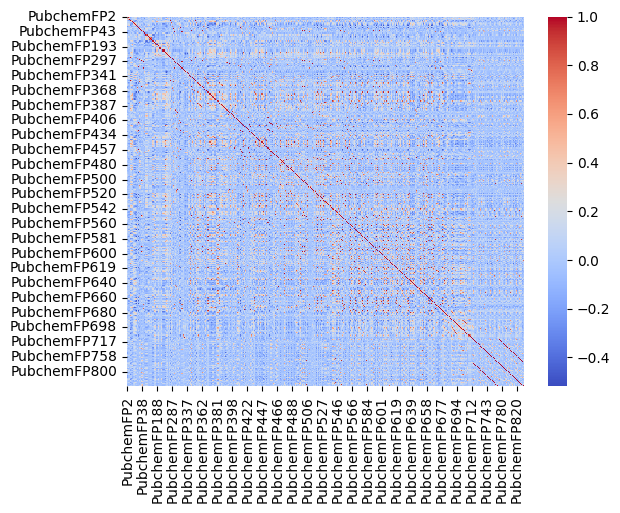

In [41]:
# Create a correlation matrix
X_corr = pd.DataFrame(X)
corr_matrix = X_corr.corr()

# Print the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm')

In [42]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
len(to_drop)
# X_corrdel = X_corr.drop(to_drop, axis=1)
# #X_corrdel.to_csv('data/Xdata_correlationdropped_7546x129.csv')
# X_corrdel.shape

232

In [43]:
df_final = X.drop(to_drop,axis=1)
df_final

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,...,PubchemFP746,PubchemFP750,PubchemFP755,PubchemFP756,PubchemFP757,PubchemFP758,PubchemFP759,PubchemFP763,PubchemFP770,PubchemFP771
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9716,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9717,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9718,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9719,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<Axes: >

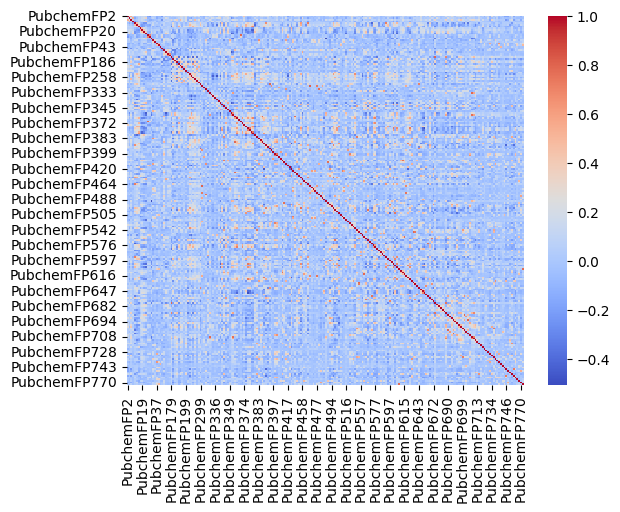

In [44]:
corr_matrix = df_final.corr()

# Print the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm')

In [45]:
df_final.to_csv('data/XdataFinal_9721x218.csv',index = False)

In [46]:
selected_features = df_final.columns.tolist()
len(selected_features)

218

In [47]:
pickle.dump((selected_features),open('data/selected_features.pkl','wb'))

## Regressor Model Training

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [50]:
X = pd.read_csv('data/XdataFinal_9721x218.csv')
X.shape

(9721, 218)

In [51]:
X = X.to_numpy()
print(X.shape)
print(type(X))

(9721, 218)
<class 'numpy.ndarray'>


In [52]:
Y = pd.read_csv('data/Ydata_9721.csv')
Y = Y.pIC50
print(Y.shape)
print(type(Y))

(9721,)
<class 'pandas.core.series.Series'>


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [54]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [01:56<00:00,  2.78s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [01:40<00:00,  2.40s/it]


In [55]:
models_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.72,0.73,0.73,0.24
ExtraTreeRegressor,0.72,0.73,0.73,0.31
ExtraTreesRegressor,0.72,0.73,0.73,9.44
GaussianProcessRegressor,0.72,0.73,0.73,14.20
RandomForestRegressor,0.68,0.69,0.78,6.41
BaggingRegressor,0.66,0.67,0.80,0.73
MLPRegressor,0.65,0.66,0.81,7.45
XGBRegressor,0.61,0.62,0.86,1.45
KNeighborsRegressor,0.48,0.50,0.99,0.49


In [56]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.25,0.34,1.14,1.17
LGBMRegressor,0.25,0.33,1.14,0.48
NuSVR,0.24,0.32,1.14,5.73
SVR,0.23,0.32,1.15,7.38
XGBRegressor,0.22,0.30,1.16,1.22
GradientBoostingRegressor,0.18,0.28,1.19,2.13
RandomForestRegressor,0.17,0.27,1.19,6.41
KNeighborsRegressor,0.17,0.26,1.20,0.24
BaggingRegressor,0.15,0.25,1.21,0.67


## Artificial Neural Network

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Lambda
from tensorflow.keras import regularizers
from keras.optimizers.legacy import Adam,Adagrad,Adamax
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [58]:
X = pd.read_csv('data/XdataFinal_9721x218.csv')
X = X.to_numpy()
Y = pd.read_csv('data/Ydata_9721.csv')
Y = Y.pIC50

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=30)

In [65]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(X_test.shape)

(9721, 218)
(9721,)
(7776, 218)
(1945, 218)


## Final Model saving

In [69]:
X = pd.read_csv('data/XdataFinal_9721x218.csv')
Y = pd.read_csv('data/Ydata_9721.csv')

<Axes: xlabel='pIC50'>

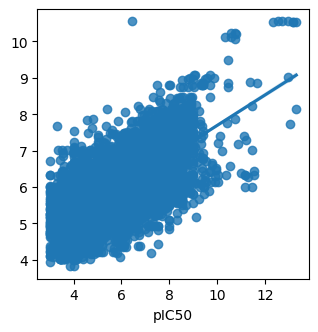

In [70]:
import lightgbm as ltb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingRegressor
model = HistGradientBoostingRegressor()
model.fit(X,Y)
y_predicted = model.predict(X)
y_expected = Y
plt.figure(figsize=(3.5,3.5))
sns.regplot(x = y_expected, y = y_predicted, fit_reg=True)

In [71]:
import pickle
pickle.dump(model,open('data/trained_model.pkl','wb'))